### 입력 데이터 전처리

In [8]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import json
from datetime import datetime, timedelta

# ✅ NetCDF 데이터 경로
nc_data_path = "../ENSEMBLE_MODEL_CROP_DATA"

# ✅ JSON에서 target_date 불러오기
json_path = "../target_metadata.json"
with open(json_path, 'r', encoding='utf-8') as f:
    metadata = json.load(f)

target_date = metadata["target_date"]  # ex) "2025013100"
target_datetime = datetime.strptime(target_date, "%Y%m%d%H")

# ✅ 10일 전 00시부터 target_date 00시까지의 날짜 리스트 생성
start_date = target_datetime - timedelta(days=10)  # 10일 전
start_date = start_date.replace(hour=0)  # 00시 기준으로 맞추기
date_list = [(start_date + timedelta(hours=12 * i)).strftime("%Y%m%d%H") 
             for i in range(((target_datetime - start_date).days * 2) + 1)]  # 12시간 간격

print(f"📅 분석할 날짜 리스트: {date_list}")


📅 분석할 날짜 리스트: ['2025012000', '2025012012', '2025012100', '2025012112', '2025012200', '2025012212', '2025012300', '2025012312', '2025012400', '2025012412', '2025012500', '2025012512', '2025012600', '2025012612', '2025012700', '2025012712', '2025012800', '2025012812', '2025012900', '2025012912', '2025013000']


In [9]:
# ✅ 데이터 저장용 리스트
datasets = []

for date in date_list:
    nc_file = os.path.join(nc_data_path, f"cropped_{date}.nc")
    
    if os.path.exists(nc_file):
        print(f"📂 파일 로드 중: {nc_file}")
        ds = xr.open_dataset(nc_file)
        datasets.append(ds)
    else:
        print(f"⚠️ 파일 없음: {nc_file}")

# ✅ 첫 번째 파일의 구조 확인
if datasets:
    print(datasets[0])  # NetCDF 구조 출력


📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012000.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012012.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012100.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012112.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012200.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012212.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012300.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012312.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012400.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012412.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012500.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012512.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012600.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012612.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012700.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012712.nc
📂 파일 로드 중: ../ENSEMBLE_M

In [10]:
# ✅ 시간 좌표 확인
for ds in datasets:
    print(ds.time.values)  # 모든 time 좌표 출력


[1.7373312e+09 1.7373420e+09 1.7373528e+09 1.7373636e+09 1.7373745e+09
 1.7373852e+09 1.7373960e+09 1.7374068e+09 1.7374176e+09 1.7374284e+09
 1.7374392e+09 1.7374500e+09 1.7374607e+09 1.7374716e+09 1.7374824e+09
 1.7374932e+09 1.7375040e+09 1.7375148e+09 1.7375256e+09 1.7375364e+09
 1.7375473e+09 1.7375580e+09 1.7375688e+09 1.7375796e+09 1.7375904e+09]
[1.7373745e+09 1.7373852e+09 1.7373960e+09 1.7374068e+09 1.7374176e+09
 1.7374284e+09 1.7374392e+09 1.7374500e+09 1.7374607e+09 1.7374716e+09
 1.7374824e+09 1.7374932e+09 1.7375040e+09 1.7375148e+09 1.7375256e+09
 1.7375364e+09 1.7375473e+09 1.7375580e+09 1.7375688e+09 1.7375796e+09
 1.7375904e+09 1.7376012e+09 1.7376120e+09 1.7376228e+09 1.7376335e+09]
[1.7374176e+09 1.7374284e+09 1.7374392e+09 1.7374500e+09 1.7374607e+09
 1.7374716e+09 1.7374824e+09 1.7374932e+09 1.7375040e+09 1.7375148e+09
 1.7375256e+09 1.7375364e+09 1.7375473e+09 1.7375580e+09 1.7375688e+09
 1.7375796e+09 1.7375904e+09 1.7376012e+09 1.7376120e+09 1.7376228e+09
 1.7

In [11]:
# ✅ 위도 & 경도 좌표 확인
latitudes = datasets[0].latitude.values
longitudes = datasets[0].longitude.values

print(f"📌 위도 범위: {latitudes.min()} ~ {latitudes.max()} ({len(latitudes)}개)")
print(f"📌 경도 범위: {longitudes.min()} ~ {longitudes.max()} ({len(longitudes)}개)")

📌 위도 범위: 32.400001525878906 ~ 34.900001525878906 (26개)
📌 경도 범위: 125.0 ~ 128.10000610351562 (32개)


In [12]:
for ds in datasets:
    print(f"📅 날짜: {ds.time.values[0]}")
    print(f"📊 UGRD 평균: {ds.UGRD_10maboveground.mean().values:.3f}, 최소: {ds.UGRD_10maboveground.min().values:.3f}, 최대: {ds.UGRD_10maboveground.max().values:.3f}")
    print(f"📊 VGRD 평균: {ds.VGRD_10maboveground.mean().values:.3f}, 최소: {ds.VGRD_10maboveground.min().values:.3f}, 최대: {ds.VGRD_10maboveground.max().values:.3f}")

📅 날짜: 1737331200.0
📊 UGRD 평균: 1.103, 최소: -6.213, 최대: 8.387
📊 VGRD 평균: -3.310, 최소: -8.072, 최대: 3.679
📅 날짜: 1737374464.0
📊 UGRD 평균: 0.168, 최소: -7.644, 최대: 8.350
📊 VGRD 평균: -2.900, 최소: -8.562, 최대: 4.242
📅 날짜: 1737417600.0
📊 UGRD 평균: -1.254, 최소: -9.170, 최대: 5.773
📊 VGRD 평균: -2.552, 최소: -8.337, 최대: 5.058
📅 날짜: 1737460736.0
📊 UGRD 평균: -2.208, 최소: -9.038, 최대: 5.862
📊 VGRD 평균: -3.046, 최소: -8.721, 최대: 3.860
📅 날짜: 1737504000.0
📊 UGRD 평균: -3.205, 최소: -9.858, 최대: 5.685
📊 VGRD 평균: -3.550, 최소: -10.329, 최대: 3.732
📅 날짜: 1737547264.0
📊 UGRD 평균: -3.873, 최소: -11.952, 최대: 5.783
📊 VGRD 평균: -4.329, 최소: -10.998, 최대: 4.020
📅 날짜: 1737590400.0
📊 UGRD 평균: -4.907, 최소: -11.378, 최대: 2.800
📊 VGRD 평균: -5.101, 최소: -12.125, 최대: 3.796
📅 날짜: 1737633536.0
📊 UGRD 평균: -5.377, 최소: -11.790, 최대: 4.392
📊 VGRD 평균: -4.728, 최소: -10.470, 최대: 4.153
📅 날짜: 1737676800.0
📊 UGRD 평균: -4.399, 최소: -11.877, 최대: 12.095
📊 VGRD 평균: -4.469, 최소: -11.090, 최대: 6.808
📅 날짜: 1737720064.0
📊 UGRD 평균: -1.506, 최소: -11.807, 최대: 14.549
📊 VGRD 평균: -4.380, 최소

d:\2025research\20250204\2025rnd\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\2025research\20250204\2025rnd\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\2025research\20250204\2025rnd\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48289 (\N{HANGUL SYLLABLE BEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\2025research\20250204\2025rnd\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


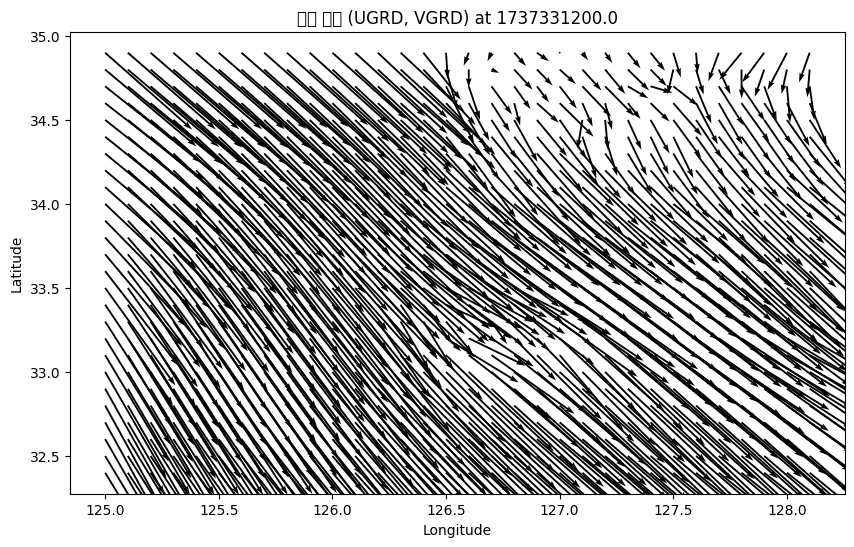

In [13]:
import matplotlib.pyplot as plt

# ✅ 특정 날짜 선택
sample_ds = datasets[0]

# ✅ 특정 시간 선택 (첫 번째 시간 스텝)
time_index = 0
ugrd = sample_ds.UGRD_10maboveground.isel(time=time_index)
vgrd = sample_ds.VGRD_10maboveground.isel(time=time_index)

# ✅ 벡터 필드 그리기
plt.figure(figsize=(10, 6))
plt.quiver(sample_ds.longitude, sample_ds.latitude, ugrd, vgrd, scale=50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"바람 벡터 (UGRD, VGRD) at {sample_ds.time.values[time_index]}")
plt.show()

### 데이터 펼치기

In [16]:

# ✅ 데이터 저장용 리스트
all_data = []

for date in date_list:
    nc_file = os.path.join(nc_data_path, f"cropped_{date}.nc")
    
    if os.path.exists(nc_file):
        print(f"📂 파일 로드 중: {nc_file}")
        ds = xr.open_dataset(nc_file)

        # ✅ NetCDF 데이터를 DataFrame으로 변환
        df = ds.to_dataframe().reset_index()

        # ✅ 필요한 변수만 선택
        df = df[['time', 'latitude', 'longitude', 'UGRD_10maboveground', 'VGRD_10maboveground']]

        # ✅ 날짜별 데이터 저장
        all_data.append(df)
    else:
        print(f"⚠️ 파일 없음: {nc_file}")

# ✅ 모든 날짜 데이터를 하나의 DataFrame으로 합치기
df_all = pd.concat(all_data, ignore_index=True)

# ✅ 데이터 확인
print(df_all.head())


📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012000.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012012.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012100.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012112.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012200.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012212.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012300.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012312.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012400.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012412.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012500.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012512.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012600.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012612.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012700.nc
📂 파일 로드 중: ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012712.nc
📂 파일 로드 중: ../ENSEMBLE_M

In [17]:
df_all

,time,latitude,longitude,UGRD_10maboveground,VGRD_10maboveground
0,1.737331e+09,32.400002,125.000000,3.704649,-6.067770
1,1.737342e+09,32.400002,125.000000,3.500380,-6.015373
2,1.737353e+09,32.400002,125.000000,5.115825,-5.924464
3,1.737364e+09,32.400002,125.000000,5.428569,-5.652524
4,1.737374e+09,32.400002,125.000000,3.612476,-6.396767
...,...,...,...,...,...
436795,1.738411e+09,34.900002,128.100006,-2.577039,-5.254018
436796,1.738422e+09,34.900002,128.100006,-0.223511,-3.780316
436797,1.738433e+09,34.900002,128.100006,-1.570834,-8.577523
436798,1.738444e+09,34.900002,128.100006,-1.192828,-4.777678


In [18]:
import numpy as np

# ✅ 원본 time 데이터 (Unix Timestamp -> datetime 변환)
df_all["time"] = pd.to_datetime(df_all["time"], unit="s")

# ✅ 시간의 주기성을 고려하여 sin, cos 변환
df_all["hour_sin"] = np.sin(2 * np.pi * df_all["time"].dt.hour / 24)
df_all["hour_cos"] = np.cos(2 * np.pi * df_all["time"].dt.hour / 24)
df_all["day_sin"] = np.sin(2 * np.pi * df_all["time"].dt.day / 31)  # 한 달을 31일로 가정
df_all["day_cos"] = np.cos(2 * np.pi * df_all["time"].dt.day / 31)

# ✅ 변환된 데이터 확인
print(df_all[["time", "hour_sin", "hour_cos", "day_sin", "day_cos"]].head())


                 time      hour_sin      hour_cos   day_sin   day_cos
0 2025-01-20 00:00:00  0.000000e+00  1.000000e+00 -0.790776 -0.612106
1 2025-01-20 02:59:12  5.000000e-01  8.660254e-01 -0.790776 -0.612106
2 2025-01-20 06:00:32  1.000000e+00  6.123234e-17 -0.790776 -0.612106
3 2025-01-20 08:59:44  8.660254e-01 -5.000000e-01 -0.790776 -0.612106
4 2025-01-20 12:01:04  1.224647e-16 -1.000000e+00 -0.790776 -0.612106


In [19]:
df_all.head()

,time,latitude,longitude,UGRD_10maboveground,VGRD_10maboveground,hour_sin,hour_cos,day_sin,day_cos
0,2025-01-20 00:00:00,32.400002,125.0,3.704649,-6.067770,0.000000e+00,1.000000e+00,-0.790776,-0.612106
1,2025-01-20 02:59:12,32.400002,125.0,3.500380,-6.015373,5.000000e-01,8.660254e-01,-0.790776,-0.612106
2,2025-01-20 06:00:32,32.400002,125.0,5.115825,-5.924464,1.000000e+00,6.123234e-17,-0.790776,-0.612106
3,2025-01-20 08:59:44,32.400002,125.0,5.428569,-5.652524,8.660254e-01,-5.000000e-01,-0.790776,-0.612106
4,2025-01-20 12:01:04,32.400002,125.0,3.612476,-6.396767,1.224647e-16,-1.000000e+00,-0.790776,-0.612106


In [20]:
# 정시 변환
import pandas as pd
import numpy as np

# ✅ time을 datetime 형식으로 변환
df_all["time"] = pd.to_datetime(df_all["time"], unit="s")

# ✅ 가장 가까운 정각(1시간 단위)으로 반올림
df_all["time"] = df_all["time"].dt.round("H")

# ✅ 변환된 데이터 확인
print(df_all.head())


                 time   latitude  longitude  UGRD_10maboveground  \
0 2025-01-20 00:00:00  32.400002      125.0             3.704649   
1 2025-01-20 03:00:00  32.400002      125.0             3.500380   
2 2025-01-20 06:00:00  32.400002      125.0             5.115825   
3 2025-01-20 09:00:00  32.400002      125.0             5.428569   
4 2025-01-20 12:00:00  32.400002      125.0             3.612476   

   VGRD_10maboveground      hour_sin      hour_cos   day_sin   day_cos  
0            -6.067770  0.000000e+00  1.000000e+00 -0.790776 -0.612106  
1            -6.015373  5.000000e-01  8.660254e-01 -0.790776 -0.612106  
2            -5.924464  1.000000e+00  6.123234e-17 -0.790776 -0.612106  
3            -5.652524  8.660254e-01 -5.000000e-01 -0.790776 -0.612106  
4            -6.396767  1.224647e-16 -1.000000e+00 -0.790776 -0.612106  


C:\Users\dasap\AppData\Local\Temp\ipykernel_38424\1305033741.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_all["time"] = df_all["time"].dt.round("H")


In [21]:
df_all.tail()

,time,latitude,longitude,UGRD_10maboveground,VGRD_10maboveground,hour_sin,hour_cos,day_sin,day_cos
436795,2025-02-01 12:00:00,34.900002,128.100006,-2.577039,-5.254018,1.224647e-16,-1.000000,0.201299,0.979530
436796,2025-02-01 15:00:00,34.900002,128.100006,-0.223511,-3.780316,-7.071068e-01,-0.707107,0.201299,0.979530
436797,2025-02-01 18:00:00,34.900002,128.100006,-1.570834,-8.577523,-9.659258e-01,-0.258819,0.201299,0.979530
436798,2025-02-01 21:00:00,34.900002,128.100006,-1.192828,-4.777678,-7.071068e-01,0.707107,0.201299,0.979530
436799,2025-02-02 00:00:00,34.900002,128.100006,-1.017357,-4.433875,0.000000e+00,1.000000,0.394356,0.918958


In [83]:
import os
import json
import pandas as pd

# ✅ 실행 경로 설정
base_path = "../"  # 프로젝트의 기본 경로
obs_file_path = os.path.join(base_path, "OBS_DATA_UV")  # 관측치 데이터 디렉토리
json_path = os.path.join(base_path, "target_metadata.json")  # 메타데이터 JSON 경로

# ✅ JSON에서 station_num 불러오기
with open(json_path, 'r', encoding='utf-8') as f:
    metadata = json.load(f)

station_num = metadata.get("station_num")  # 관측소 ID 가져오기
if station_num is None:
    raise ValueError("📌 `station_num`이 `target_metadata.json`에 없습니다!")

# ✅ 해당 station_num이 포함된 파일 찾기
obs_file_path_full = None
for file in os.listdir(obs_file_path):
    if file.endswith(f"{station_num}.csv"):  # 파일명이 "station_num.csv"로 끝나는지 확인
        obs_file_path_full = os.path.join(obs_file_path, file)
        break  # 파일 찾으면 바로 종료

if not obs_file_path_full:
    raise FileNotFoundError(f"📌 관측소 {station_num}의 데이터 파일을 찾을 수 없습니다: {obs_file_path}")

print(f"📂 불러올 관측 데이터 파일: {obs_file_path_full}")

# ✅ 관측치 데이터 불러오기
df_obs = pd.read_csv(obs_file_path_full)

# ✅ TIME 컬럼을 datetime 형식으로 변환
df_obs["model_fct"] = pd.to_datetime(df_obs["model_fct"], errors="coerce")

# ✅ 변환된 데이터 확인
print(f"📌 관측소 {station_num}의 데이터 불러오기 완료!")
print(df_obs.head(5))


📂 불러올 관측 데이터 파일: ../OBS_DATA_UV\khoa_buoy_KG_0028.csv
📌 관측소 KG_0028의 데이터 불러오기 완료!
            model_fct  obs_ws  obs_wd     obs_u     obs_v
0 2025-01-05 00:00:00     1.9   339.0  0.680899 -1.773803
1 2025-01-05 01:00:00     1.5   343.0  0.438558 -1.434457
2 2025-01-05 02:00:00     1.5   177.0 -0.078504  1.497944
3 2025-01-05 03:00:00     1.2   107.0 -1.147566  0.350846
4 2025-01-05 04:00:00     0.6   135.0 -0.424264  0.424264


In [84]:
df_obs.columns

Index(['model_fct', 'obs_ws', 'obs_wd', 'obs_u', 'obs_v'], dtype='object')

In [101]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta

# ✅ 실행 경로 설정
base_path = "../"
nc_data_path = os.path.join(base_path, "ENSEMBLE_MODEL_CROP_DATA")  # NC 파일 경로
obs_data_path = os.path.join(base_path, "OBS_DATA_UV")  # 관측 데이터 경로
json_path = os.path.join(base_path, "target_metadata.json")  # JSON 경로

# ✅ JSON에서 target_date와 station_num 불러오기
with open(json_path, 'r', encoding='utf-8') as f:
    metadata = json.load(f)

target_date = metadata["target_date"]  # ex) "2025013100"
station_num = str(metadata["station_num"])  # 관측소 번호
target_datetime = datetime.strptime(target_date, "%Y%m%d%H")

# ✅ 10일 동안 반복하여 샘플 생성
samples = {}

for i in range(10):
    sample_key = i
    prev_day = target_datetime - timedelta(days=(10 - i))  # 10일 전부터 순차적으로
    prev_day_00 = prev_day.replace(hour=0).strftime("%Y%m%d%H")  # 00시 예측 파일
    prev_day_12 = prev_day.replace(hour=12).strftime("%Y%m%d%H")  # 12시 예측 파일
    
    forecast_list = []

    # ✅ 먼저 prev_day_00 파일에서 데이터 추출
    first_file = os.path.join(nc_data_path, f"cropped_{prev_day_00}.nc")
    if os.path.exists(first_file):
        print(f"📂 {first_file} 처리 중...")
        ds = xr.open_dataset(first_file)
        df_first = ds.to_dataframe().reset_index()

        # ✅ 필요한 변수만 선택
        df_first = df_first[['time', 'latitude', 'longitude', 'UGRD_10maboveground', 'VGRD_10maboveground']]

        # ✅ time 값을 datetime 형식으로 변환하고 가장 가까운 정시로 변환
        df_first["time"] = pd.to_datetime(df_first["time"], unit="s")
        df_first["time"] = df_first["time"].dt.round("H")

        # ✅ 오늘 00시까지의 데이터만 필터링
        df_first = df_first[df_first["time"] <= target_datetime]

        forecast_list.append(df_first)

    # ✅ prev_day_12 파일을 이어붙임
    second_file = os.path.join(nc_data_path, f"cropped_{prev_day_12}.nc")
    if os.path.exists(second_file):
        print(f"📂 {second_file} 처리 중...")
        ds = xr.open_dataset(second_file)
        df_second = ds.to_dataframe().reset_index()

        # ✅ 필요한 변수만 선택
        df_second = df_second[['time', 'latitude', 'longitude', 'UGRD_10maboveground', 'VGRD_10maboveground']]

        # ✅ time 값을 datetime 형식으로 변환하고 가장 가까운 정시로 변환
        df_second["time"] = pd.to_datetime(df_second["time"], unit="s")
        df_second["time"] = df_second["time"].dt.round("H")

        # ✅ 오늘 00시까지의 데이터만 필터링
        df_second = df_second[df_second["time"] <= target_datetime]

        forecast_list.append(df_second)

    # ✅ 예측 데이터 합치기
    df_forecast = pd.concat(forecast_list, ignore_index=True) if forecast_list else None

    # ✅ 전날 관측 데이터 불러오기
    obs_file = [f for f in os.listdir(obs_data_path) if f.endswith(f"_{station_num}.csv")]
    
    if obs_file:
        obs_file_path = os.path.join(obs_data_path, obs_file[0])
        df_obs = pd.read_csv(obs_file_path)
        df_obs["model_fct"] = pd.to_datetime(df_obs["model_fct"], errors="coerce")
        
        # ✅ 전날 00~다음날 00시 관측 데이터 필터링
        obs_start = prev_day.replace(hour=0)
        obs_end = prev_day.replace(hour=23, minute=59, second=59) + timedelta(hours=1)  # 다음날 00시 포함
        df_obs = df_obs[(df_obs["model_fct"] >= obs_start) & (df_obs["model_fct"] < obs_end)]

        # ✅ 시간 인덱스 설정 (1시간 간격으로 리샘플링)
        df_obs.set_index("model_fct", inplace=True)
        df_obs = df_obs.resample("1H").asfreq()

        # ✅ 결측치 처리 (obs_u, obs_v의 전체 평균값으로 보간)
        obs_u_mean = df_obs["obs_u"].mean()
        obs_v_mean = df_obs["obs_v"].mean()

        df_obs["obs_u"] = df_obs["obs_u"].interpolate(method="linear").fillna(obs_u_mean)
        df_obs["obs_v"] = df_obs["obs_v"].interpolate(method="linear").fillna(obs_v_mean)
        df_obs = df_obs.resample("3H").asfreq()  # 3시간 간격 유지

        # ✅ 인덱스 컬럼으로 재설정
        df_obs.reset_index(inplace=True)

        print(f"✅ {station_num}의 관측 데이터 결측치 채움 완료 (평균 U: {obs_u_mean:.3f}, 평균 V: {obs_v_mean:.3f})")
    else:
        df_obs = None
        print(f"⚠️ 관측 데이터 없음: {station_num}")

    # ✅ 샘플 저장
    samples[sample_key] = {"forecast": df_forecast, "obs": df_obs}


📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012000.nc 처리 중...
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012012.nc 처리 중...
✅ KG_0028의 관측 데이터 결측치 채움 완료 (평균 U: 5.220, 평균 V: -3.960)
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012100.nc 처리 중...
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012112.nc 처리 중...
✅ KG_0028의 관측 데이터 결측치 채움 완료 (평균 U: 2.902, 평균 V: -4.025)
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012200.nc 처리 중...
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012212.nc 처리 중...
✅ KG_0028의 관측 데이터 결측치 채움 완료 (평균 U: 0.034, 평균 V: -2.194)
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012300.nc 처리 중...
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012312.nc 처리 중...
✅ KG_0028의 관측 데이터 결측치 채움 완료 (평균 U: -0.009, 평균 V: -2.434)
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012400.nc 처리 중...
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012412.nc 처리 중...
✅ KG_0028의 관측 데이터 결측치 채움 완료 (평균 U: -3.347, 평균 V: -3.476)
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012500.nc 처리 중...
📂 ../ENSEMBLE_MODEL_CROP_DATA\cropped_2025012512.nc 처리 중..

C:\Users\dasap\AppData\Local\Temp\ipykernel_38424\79834119.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_first["time"] = df_first["time"].dt.round("H")
C:\Users\dasap\AppData\Local\Temp\ipykernel_38424\79834119.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_second["time"] = df_second["time"].dt.round("H")
C:\Users\dasap\AppData\Local\Temp\ipykernel_38424\79834119.py:89: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_obs = df_obs.resample("1H").asfreq()
C:\Users\dasap\AppData\Local\Temp\ipykernel_38424\79834119.py:97: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_obs = df_obs.resample("3H").asfreq()  # 3시간 간격 유지
C:\Users\dasap\AppData\Local\Temp\ipykernel_38424\79834119.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, p

In [102]:
len(samples)

10

In [103]:
samples.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
samples[0]

{'forecast':                      time   latitude   longitude  UGRD_10maboveground  \
 0     2025-01-20 00:00:00  32.400002  125.000000             3.704649   
 1     2025-01-20 03:00:00  32.400002  125.000000             3.500380   
 2     2025-01-20 06:00:00  32.400002  125.000000             5.115825   
 3     2025-01-20 09:00:00  32.400002  125.000000             5.428569   
 4     2025-01-20 12:00:00  32.400002  125.000000             3.612476   
 ...                   ...        ...         ...                  ...   
 41595 2025-01-23 00:00:00  34.900002  128.100006            -0.990211   
 41596 2025-01-23 03:00:00  34.900002  128.100006            -0.058203   
 41597 2025-01-23 06:00:00  34.900002  128.100006            -2.680348   
 41598 2025-01-23 09:00:00  34.900002  128.100006            -0.522857   
 41599 2025-01-23 12:00:00  34.900002  128.100006            -1.219940   
 
        VGRD_10maboveground  
 0                -6.067770  
 1                -6.015373  
 2      

In [105]:
# ✅ 예측 데이터 (Forecast) 데이터프레임
df_forecast = samples[0]["forecast"]  # 샘플 0번의 예측 데이터
print("📌 예측 데이터 (Forecast) 미리보기:")
df_forecast.head()  # 상위 5개 행 확인


📌 예측 데이터 (Forecast) 미리보기:


,time,latitude,longitude,UGRD_10maboveground,VGRD_10maboveground
0,2025-01-20 00:00:00,32.400002,125.0,3.704649,-6.067770
1,2025-01-20 03:00:00,32.400002,125.0,3.500380,-6.015373
2,2025-01-20 06:00:00,32.400002,125.0,5.115825,-5.924464
3,2025-01-20 09:00:00,32.400002,125.0,5.428569,-5.652524
4,2025-01-20 12:00:00,32.400002,125.0,3.612476,-6.396767


In [106]:
df_forecast.shape

(41600, 5)

In [108]:

# ✅ 관측 데이터 (Observation) 데이터프레임
df_obs = samples[0]["obs"]  # 샘플 0번의 관측 데이터
print("\n📌 관측 데이터 (Observation) 미리보기:")
df_obs.head()  # 상위 5개 행 확인


📌 관측 데이터 (Observation) 미리보기:


,model_fct,obs_ws,obs_wd,obs_u,obs_v
0,2025-01-20 00:00:00,5.2,278.0,5.149394,-0.723700
1,2025-01-20 03:00:00,5.9,289.0,5.578560,-1.920852
2,2025-01-20 06:00:00,7.0,293.0,6.443534,-2.735118
3,2025-01-20 09:00:00,6.4,305.0,5.242573,-3.670889
4,2025-01-20 12:00:00,6.1,308.0,4.806866,-3.755535


In [109]:
print("\n📌 변환된 관측 데이터 (Observation) 미리보기:")
df_obs.head()


📌 변환된 관측 데이터 (Observation) 미리보기:


,model_fct,obs_ws,obs_wd,obs_u,obs_v
0,2025-01-20 00:00:00,5.2,278.0,5.149394,-0.723700
1,2025-01-20 03:00:00,5.9,289.0,5.578560,-1.920852
2,2025-01-20 06:00:00,7.0,293.0,6.443534,-2.735118
3,2025-01-20 09:00:00,6.4,305.0,5.242573,-3.670889
4,2025-01-20 12:00:00,6.1,308.0,4.806866,-3.755535


In [110]:
df_obs["latitude"] = obs_lat
df_obs["longitude"] = obs_lon


In [111]:
df_obs

,model_fct,obs_ws,obs_wd,obs_u,obs_v,latitude,longitude
0,2025-01-20 00:00:00,5.2,278.0,5.149394,-0.723700,33.7,126.59
1,2025-01-20 03:00:00,5.9,289.0,5.578560,-1.920852,33.7,126.59
2,2025-01-20 06:00:00,7.0,293.0,6.443534,-2.735118,33.7,126.59
3,2025-01-20 09:00:00,6.4,305.0,5.242573,-3.670889,33.7,126.59
4,2025-01-20 12:00:00,6.1,308.0,4.806866,-3.755535,33.7,126.59
5,2025-01-20 15:00:00,7.4,301.0,6.343038,-3.811282,33.7,126.59
6,2025-01-20 18:00:00,7.9,313.0,5.777694,-5.387787,33.7,126.59
7,2025-01-20 21:00:00,7.6,329.0,3.914289,-6.514471,33.7,126.59
8,2025-01-21 00:00:00,7.4,335.0,3.127375,-6.706678,33.7,126.59


In [96]:
meta_data_path = os.path.join(base_path, "SAR_meta_data.csv")  # 관측소 메타데이터 경로
json_path = os.path.join(base_path, "target_metadata.json")  # JSON 경로

# ✅ JSON에서 target_date와 station_num 불러오기
with open(json_path, 'r', encoding='utf-8') as f:
    metadata = json.load(f)

target_date = metadata["target_date"]  # ex) "2025013100"
station_num = str(metadata["station_num"])  # 관측소 번호
target_datetime = datetime.strptime(target_date, "%Y%m%d%H")

# ✅ 관측소 좌표 불러오기
meta_df = pd.read_csv(meta_data_path, encoding="cp949")
obs_station = meta_df[meta_df["stn_num"] == station_num]

if not obs_station.empty:
    obs_lat = obs_station["lat"].values[0]
    obs_lon = obs_station["lon"].values[0]
    print(f"📍 관측소 {station_num}의 좌표: ({obs_lat}, {obs_lon})")
else:
    raise ValueError(f"🚨 관측소 {station_num}의 좌표를 찾을 수 없습니다.")

📍 관측소 KG_0028의 좌표: (33.7, 126.59)


In [116]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class WindDataset(Dataset):
    def __init__(self, samples):
        self.data = []
        self.labels = []
        
        for sample_key in samples.keys():
            df_forecast = samples[sample_key]["forecast"]
            df_obs = samples[sample_key]["obs"]

            if df_forecast is None or df_obs is None:
                continue  # 데이터가 없으면 건너뜀
            
            # ✅ 시간 정리
            df_forecast["time"] = pd.to_datetime(df_forecast["time"])
            df_obs["model_fct"] = pd.to_datetime(df_obs["model_fct"])
            
            # ✅ 중복 제거 (시간-위도-경도 조합)
            df_forecast = df_forecast.groupby(["time", "latitude", "longitude"]).mean().reset_index()

            # ✅ 시간 정규화
            df_forecast["hour"] = df_forecast["time"].dt.hour / 24.0  # 0~1 범위

            # ✅ 좌표 정보 정규화
            df_forecast["latitude"] = (df_forecast["latitude"] - df_forecast["latitude"].min()) / (df_forecast["latitude"].max() - df_forecast["latitude"].min())
            df_forecast["longitude"] = (df_forecast["longitude"] - df_forecast["longitude"].min()) / (df_forecast["longitude"].max() - df_forecast["longitude"].min())

            # ✅ 2D Grid 변환 (시간 × 공간)
            grid_data = df_forecast.pivot(index="time", columns=["latitude", "longitude"], values=["UGRD_10maboveground", "VGRD_10maboveground", "hour"])
            grid_data = grid_data.fillna(0).values  # 결측치 처리

            # 🔹 **Grid 데이터를 3D 형태로 변환** (시간, 공간, 변수)
            time_steps = len(df_forecast["time"].unique())  # 시간 개수
            grid_data = grid_data.reshape(time_steps, -1, 3)  # (시간, 공간, 변수)

            # ✅ 관측 데이터 추출 (특정 지점의 값)
            obs_u = df_obs["obs_u"].mean()
            obs_v = df_obs["obs_v"].mean()

            # ✅ 모든 위치에서 같은 값으로 obs_u, obs_v 추가
            obs_u_grid = np.full((time_steps, grid_data.shape[1]), obs_u)  # 시간 × 공간
            obs_v_grid = np.full((time_steps, grid_data.shape[1]), obs_v)  # 시간 × 공간

            # 🔹 **obs_u, obs_v도 3D로 변환**
            obs_u_grid = obs_u_grid[..., np.newaxis]  # (시간, 공간, 1)
            obs_v_grid = obs_v_grid[..., np.newaxis]  # (시간, 공간, 1)

            # ✅ 최종 입력 데이터 (UGRD, VGRD, hour, obs_u, obs_v 포함)
            X_sample = np.concatenate([grid_data, obs_u_grid, obs_v_grid], axis=-1)  # (시간, 공간, 5)

            self.data.append(torch.tensor(X_sample, dtype=torch.float32))
            self.labels.append(torch.tensor([obs_u, obs_v], dtype=torch.float32))  # 정답값

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# ✅ Dataset & DataLoader 생성
dataset = WindDataset(samples)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

print(f"✅ 데이터 로드 완료! 총 {len(dataset)}개 샘플")


✅ 데이터 로드 완료! 총 10개 샘플


In [118]:
dataset[0]

(tensor([[[ 3.7046,  3.9269,  4.0945,  5.1537, -3.9140],
          [ 4.2843,  4.4336,  4.6168,  5.1537, -3.9140],
          [ 4.7757,  4.8841,  4.9945,  5.1537, -3.9140],
          ...,
          [ 0.0000,  0.0000,  0.0000,  5.1537, -3.9140],
          [ 0.0000,  0.0000,  0.0000,  5.1537, -3.9140],
          [ 0.0000,  0.0000,  0.0000,  5.1537, -3.9140]],
 
         [[ 3.5004,  3.6135,  3.7043,  5.1537, -3.9140],
          [ 3.8050,  3.8860,  3.9863,  5.1537, -3.9140],
          [ 4.0513,  4.0832,  4.1116,  5.1537, -3.9140],
          ...,
          [ 0.1250,  0.1250,  0.1250,  5.1537, -3.9140],
          [ 0.1250,  0.1250,  0.1250,  5.1537, -3.9140],
          [ 0.1250,  0.1250,  0.1250,  5.1537, -3.9140]],
 
         [[ 5.1158,  5.2146,  5.2797,  5.1537, -3.9140],
          [ 5.3366,  5.3843,  5.4488,  5.1537, -3.9140],
          [ 5.4780,  5.4683,  5.4188,  5.1537, -3.9140],
          ...,
          [ 0.2500,  0.2500,  0.2500,  5.1537, -3.9140],
          [ 0.2500,  0.2500,  0.2500,